In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import stock_module as sm
import random
import os
import datetime
import time
import openpyxl

In [2]:
stock_name = "BIMAS"
start_date = "01-01-2018"
end_date = "31-07-2020"
MA_days = [7, 14, 20, 50, 100, 200]
RSI_day = 14
trajectory_day = 14

In [3]:
frame = sm.whole_frame(stock_name, MA_days, start_date, end_date, RSI_day, trajectory_day)

/Users/mturan/Desktop/Scripts/stock_analysis/stock_module.py:1250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f"{column}_CH"] = data[f"{column}"].pct_change()


In [70]:
BIST50 = ["TUPRS", "VAKBN","TOASO","KRDMD","MGROS","DOHOL","AKBNK","TKFEN","FROTO","GARAN","KOZAA","HALKB",
         "KORDS","TCELL","ENKAI","KOZAL","VESTL","TSKB","YKBNK","SODA","TTKOM","SKBNK","BIMAS","ODAS","PETKM",
          "SISE","ANACM", "ARCLK", "YATAS", "EREGL", "SASA", "ALARK", "SAHOL", "AEFES", "EKGYO", "THYAO",
         "HEKTS", "PGSUS", "ISCTR", "TRKCM", "KCHOL", "ISFIN", "ASELS", "TAVHL","IPEKE","ULKER","CCOLA",
         "GUBRF","AGHOL", "ENJSA"]

In [71]:
BIST100 = ["GUSGR", "ALGYO", "KAREL", "ALKIM", "TTRAK", "ALKIM", "LOGO", "AKCNS", "GOZDE", "BRSAN", 
           "ECZYT", "DOAS", "NETAS", "TMSN", "ZOREN", "CLEBI", "KERVT", "TRGYO", "AYGAZ", "GOODY",
          "ISMEN", "BRISA", "CEMTS", "AKSEN", "KARTN", "GLYHO", "ISGYO", "DEVA", "ECILC", "KARSN",
          "SARKY", "ALBRK", "ANHYT", "RYGYO", "BUCIM", "EGEEN", "CIMSA", "NTHOL", "HLGYO","MPARK",
          "SELEC", "OZKGY", "OTKAR", "AKSA", "AKGRT", "KLMSN", "BIZIM", "TATGD", "ISDMR", "MAVI",
          "SOKM"]

In [43]:
frame_ = pd.read_pickle("frame_whole_BIST50")

In [4]:
stock_name = "AKBNK"
start_date = "01-01-2019"
end_date = "31-01-2020"

In [ ]:
frame = frame_.loc[frame_["stock_name"] == stock_name]
frame = frame.loc[frame.index > start_date]
frame = frame.loc[frame.index < end_date]

In [5]:
frame.shape

(596, 31)

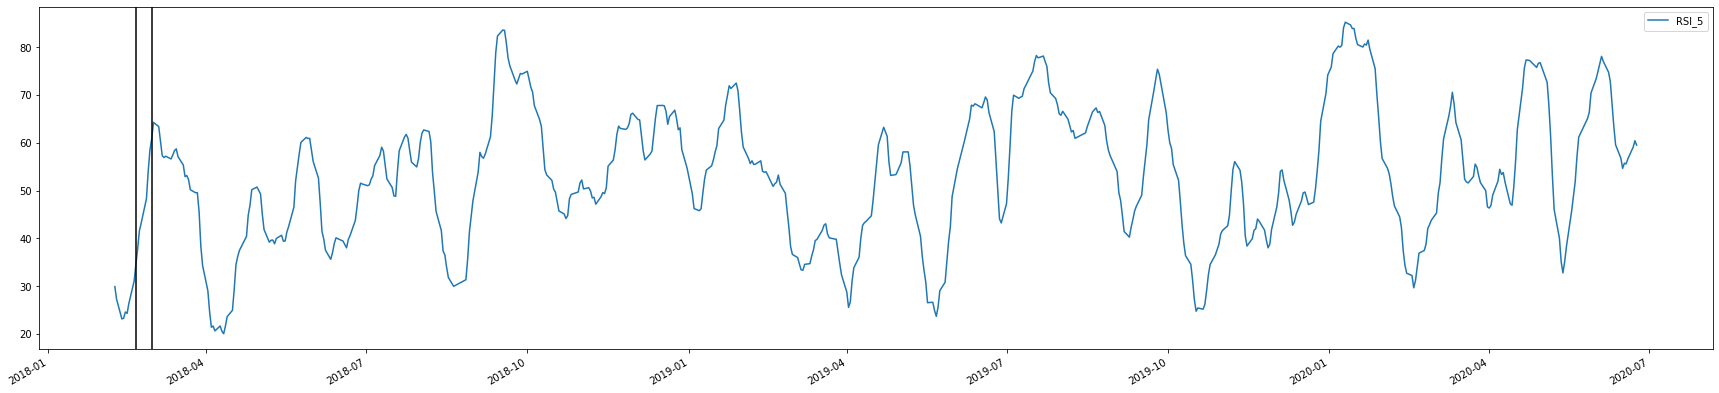

In [9]:
frame[["RSI_5"]].plot(figsize=[30,7])
plt.axvline(frame.iloc[11:,:].index[0], color="black")
plt.axvline(frame.iloc[18:,:].index[0], color="black")

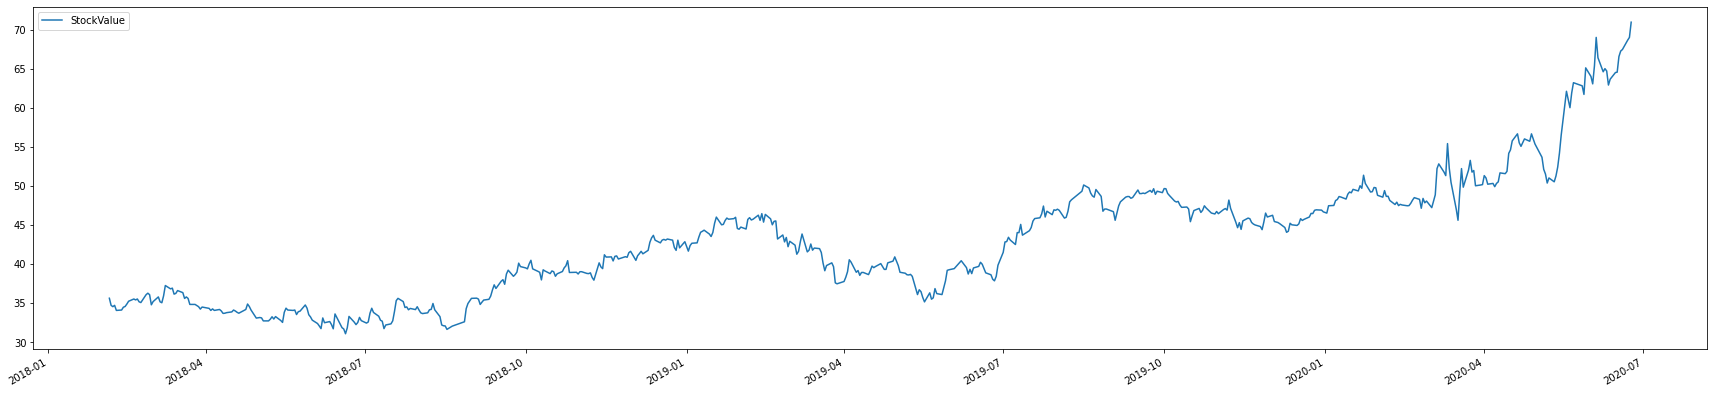

In [10]:
frame[["StockValue"]].plot(figsize=[30,7])
# plt.axvline(frame.iloc[2122:,:].index[0], color="black")
# plt.axvline(frame.iloc[2128:,:].index[0], color="black")
# plt.axhline(-0.01, color="red")

In [11]:
# MA_100_CH 0'dan büyük ve MA_14_CH de -0.05'ten büyükse
frame['day'] = np.where((frame['MA_200_CH'] > 0) &
                    (frame['MA_100_CH'] > -0.001) &
                    (frame['MA_50_CH'] > -0.002) &
                    (frame['MA_14_CH'] > -0.003) &
                    # (frame['MA_7'] > frame['MA_50']) &
                    (frame['MA_14'] > (frame['MA_100']*0.90)) &
                    (frame['MA_20'] > (frame['MA_200']*0.95)) &
                    (frame['RSI_5'] > 35) &
                    (frame['RSI_5_CH'] > -0.02) &
                    (frame['RSI_CH'] > -0.02) &
                    (frame["StockValue_momentum"] > 95) &
                    (frame["MA_14_CH_CH"] > -3) &
                    (frame["MA_50_CH_CH"] > -2) &
                    (frame["MA_200_CH_CH"] > -1) &
                    (frame["MA_100_CH_CH"] > -0.5) &
                    (frame['market_positive_ma_10'] > 0.35)
                    # (frame['marketV_to_bookV'] < 10)
                    , "BUY", "SELL")

In [12]:
# KAÇ TANESİ GEÇİYOR SAY (-1 TUTMAMA DURUMUNDA KABUL ET)

In [13]:
locations = []
start = 0
for row in range(frame.shape[0]-1):
    if frame.day[row] == "BUY":
        mode = "BUY"
        if (frame.day[row] == "BUY" and frame.day[row+1] == "SELL"):
            end = row
            loc = [start, end]
            locations.append(loc)

    else:
        mode = "SELL"
        if (frame.day[row] == "SELL" and frame.day[row+1] == "BUY"):
            start = row+1

In [14]:
locations

[[15, 18],
 [33, 33],
 [35, 36],
 [54, 62],
 [154, 165],
 [168, 168],
 [181, 182],
 [184, 226],
 [233, 252],
 [254, 255],
 [261, 264],
 [267, 267],
 [358, 386],
 [388, 390],
 [400, 414],
 [433, 441],
 [443, 449],
 [454, 454],
 [456, 456],
 [467, 488],
 [514, 516],
 [518, 524],
 [527, 527],
 [534, 534],
 [542, 563],
 [573, 590],
 [592, 594]]

In [15]:
sum([i[1] - i[0] for i in locations])

216

In [16]:
rets = []
for obs in locations:
    ret = (frame.StockValue[obs[1]] - frame.StockValue[obs[0]]) / frame.StockValue[obs[0]]
    rets.append(ret)
    print(ret)

-0.035902713438483
0.0
-0.004131732741827212
-0.029182862046541868
0.08213831935695261
0.0
0.000624750935198256
0.09855640385813837
0.0395763189653416
0.011308901439752122
-0.040482375345260044
0.0
0.07968923418423982
-0.007230965546575997
-0.01415285078851603
-0.02465979434735223
-0.0158241758241758
0.0
0.0
0.08296751536435472
0.014855687606112115
0.0868644067796609
0.0
0.0
0.025896414342629424
0.0751211631663974
0.02297998517420307


In [17]:
rets = [ret + 1 for ret in rets]

In [18]:
retur = 1
for ret in rets:
    retur = retur * ret
retur

1.5291084006504783

In [19]:
frame

,MA_7,MA_14,MA_20,MA_50,MA_100,MA_200,MA_7_CH,MA_7_CH_CH,MA_14_CH,MA_14_CH_CH,...,Drawdown,marketV_to_bookV,StockValue,StockValue_momentum,market_positive,market_positive_ma_10,stock_name,volume,volume_ma_14,day
2018-02-05,36.091329,36.348150,36.357055,36.149000,36.246685,33.870997,-0.000578,0.343185,-0.000825,-0.074951,...,-6.896669e-02,7.6211,35.5948,97.504773,0.272464,0.482006,BIMAS,59193065.0,6.982236e+07,SELL
2018-02-06,35.793429,36.187214,36.264775,36.142768,36.234730,33.914101,-0.001309,0.364381,-0.001142,-0.033144,...,-9.278998e-02,7.42608,34.6840,93.900171,0.130556,0.420810,BIMAS,53827956.0,6.904652e+07,SELL
2018-02-07,35.519486,36.005729,36.168895,36.131262,36.221335,33.954724,-0.002003,0.345081,-0.001466,0.005775,...,-9.717903e-02,7.39016,34.5162,93.143536,0.646341,0.420824,BIMAS,117872088.7,7.353706e+07,SELL
2018-02-08,35.290071,35.889307,36.089795,36.132222,36.206525,33.995482,-0.002431,0.282002,-0.001541,0.050126,...,-9.278998e-02,7.42608,34.6840,95.511636,0.239554,0.416791,BIMAS,56006326.0,7.438565e+07,SELL
2018-02-09,35.005857,35.733507,35.984330,36.119278,36.187622,34.029602,-0.002993,0.275596,-0.001571,0.167923,...,-1.097184e-01,7.28752,34.0368,93.977580,0.302671,0.373785,BIMAS,40453494.0,7.217316e+07,SELL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-18,64.871429,65.107143,64.310000,57.787744,53.622972,50.385232,0.002795,-0.072583,0.009117,0.091306,...,-2.536232e-02,8.3838,67.2500,103.302611,0.583554,0.533244,BIMAS,186500027.0,2.830882e+08,SELL
2020-06-19,65.264286,65.353571,64.682500,58.132744,53.794472,50.489982,0.002917,-0.078877,0.008173,0.048477,...,-2.246377e-02,8.3838,67.4500,105.390625,0.270619,0.514677,BIMAS,264869976.0,2.727988e+08,BUY
2020-06-22,66.085714,65.753571,65.020000,58.499744,53.988972,50.596132,0.003319,-0.078964,0.007556,0.022079,...,-5.072464e-03,8.3838,68.6500,108.881840,0.641304,0.530001,BIMAS,159781132.0,2.559669e+08,BUY
2020-06-23,66.850000,66.014286,65.310000,58.882144,54.186572,50.701432,0.003587,-0.082182,0.006560,-0.008021,...,-2.409699e-16,8.3838,69.0000,105.585310,0.480000,0.535785,BIMAS,160223648.0,2.509531e+08,BUY


---

In [24]:
frame_ = pd.read_pickle("frame_whole_BIST50")

In [25]:
BIST50 = ["TUPRS", "VAKBN","TOASO","KRDMD","MGROS","DOHOL","AKBNK","TKFEN","FROTO","GARAN","KOZAA","HALKB",
         "KORDS","TCELL","ENKAI","KOZAL","VESTL","TSKB","YKBNK","SODA","TTKOM","SKBNK","BIMAS","ODAS","PETKM",
          "SISE","ANACM", "ARCLK", "YATAS", "EREGL", "SASA", "ALARK", "SAHOL", "AEFES", "EKGYO", "THYAO",
         "HEKTS", "PGSUS", "ISCTR", "TRKCM", "KCHOL", "ISFIN", "ASELS", "TAVHL","IPEKE","ULKER","CCOLA",
         "GUBRF","AGHOL", "ENJSA"]

In [26]:
stocks = BIST50
# np.random.shuffle(stocks)
# stocks = np.array_split(stocks, 3)
# stocks = list(stocks[0])
# stocks

In [51]:
start_date = "01-01-2015"
end_date = "31-07-2020"
duration = []
transaction = []
short_transaction = [] 
negatives = []
positives = [] 
returns = [] 
for stock in stocks:
    frame = frame_.loc[frame_["stock_name"] == stock]
    frame = frame.loc[frame.index > start_date]
    frame = frame.loc[frame.index < end_date]
    
    frame['day'] = np.where((frame['MA_200_CH'] > 0) &
                        (frame['MA_100_CH'] > -0.001) &
                        (frame['MA_50_CH'] > -0.002) &
                        (frame['MA_14_CH'] > -0.003) &
                        # (frame['MA_7'] > frame['MA_50']) &
                        (frame['MA_14'] > (frame['MA_100']*0.90)) &
                        (frame['MA_20'] > (frame['MA_200']*0.95)) &
                        (frame['RSI_5'] > 35) &
                        (frame['RSI_5_CH'] > -0.02) &
                        (frame['RSI_CH'] > -0.02) &
                        (frame["StockValue_momentum"] > 100) &
                        (frame["MA_14_CH_CH"] > -3) &
                        (frame["MA_50_CH_CH"] > -2) &
                        (frame["MA_200_CH_CH"] > -1) &
                        (frame["MA_100_CH_CH"] > -0.5) &
                        (frame['market_positive_ma_10'] > 0.35)
                        # (frame['marketV_to_bookV'] < 10)
                        , "BUY", "SELL")
    
    locations = []
    start = 0
    for row in range(frame.shape[0]-1):
        if frame.day[row] == "BUY":
            mode = "BUY"
            if (frame.day[row] == "BUY" and frame.day[row+1] == "SELL"):
                end = row+1
                loc = [start, end]
                locations.append(loc)

        else:
            mode = "SELL"
            if (frame.day[row] == "SELL" and frame.day[row+1] == "BUY"):
                start = row+1
         
    duration.append(sum([i[1] - i[0] for i in locations])) 
    transaction.append(len(locations))
    short_transaction.append(len([i for i in locations if i[0]-i[1] == 0]))
        
    rets = []
    for obs in locations:
        ret = (frame.StockValue[obs[1]] - frame.StockValue[obs[0]]) / frame.StockValue[obs[0]]
        rets.append(ret)
        
    rets = [ret + 1 for ret in rets]
    
    retur = 1
    for ret in rets:
        retur = retur * ret
        
    rets = np.array(rets)
    
    negative_ones = rets[np.where(rets<1)]
    negatives.append(negative_ones)
    
    positive_ones = rets[np.where(rets>1)]
    positives.append(positive_ones)
    
    returns.append(retur)

In [52]:
returns = [ret - 0.01 for ret in returns]

In [53]:
np.prod(returns) 

499617077.8402757

In [54]:
print(f"number of total transaction : {sum(transaction)}")

number of total transaction : 2187


In [55]:
fee = 9/10000
print(f"Total commission fee: {fee*sum(transaction)*2}")

Total commission fee: 3.9366


In [56]:
print(f"number of short transactions : {sum(short_transaction)}")

number of short transactions : 0


In [57]:
print(f"short transaction ratio : {round(sum(short_transaction) / sum(transaction),2)}")

short transaction ratio : 0.0


In [58]:
print(f"Total exposure day : {sum(duration)}")

Total exposure day : 17918


In [59]:
print(f"Number of positive returns : {len(np.concatenate(positives))}")

Number of positive returns : 846


In [60]:
print(f"mean of positives : {np.concatenate(positives).mean()}")

mean of positives : 1.0724336628810878


In [61]:
print(f"Number of negative returns : {len(np.concatenate(negatives))}")

Number of negative returns : 1273


In [62]:
print(f"mean of negatives : {np.concatenate(negatives).mean()}")

mean of negatives : 0.9733927052967297


In [63]:
print(f"Positives / Negatives : {len(np.concatenate(positives)) / len(np.concatenate(negatives))}")

Positives / Negatives : 0.6645718774548312


In [64]:
root = sum(duration) / 1000
root

17.918

In [65]:
(pow(np.prod(returns),(1/root))) * root

54.797247050942424

In [66]:
returns = np.array(returns)

In [67]:
returns

array([0.86125314, 1.36860862, 0.74520019, 1.38564205, 1.05876042,
       1.0482073 , 0.91367239, 1.12898632, 0.64017092, 0.82807833,
       3.12793805, 1.06597584, 2.89908833, 0.9361276 , 0.88832126,
       1.77012539, 1.43320952, 0.99821168, 1.08183455, 1.88695846,
       0.74536522, 1.19812934, 1.61089333, 1.15970138, 1.73447289,
       1.60292777, 2.07146887, 1.06447023, 9.06828722, 1.58778765,
       8.79305715, 2.22393267, 0.67649829, 1.09057092, 0.78907552,
       0.88343637, 3.09407624, 2.12706743, 1.42805453, 1.57175286,
       0.73168354, 6.59690388, 4.9268565 , 0.93794843, 2.39610947,
       0.73290692, 0.9155415 , 7.75852396, 2.49721641, 1.070742  ])

In [68]:
np.random.shuffle(returns)
samples = np.array_split(returns, round(root))
samples

[array([1.06597584, 0.9155415 , 1.60292777]),
 array([7.75852396, 0.64017092, 0.9361276 ]),
 array([1.88695846, 0.93794843, 4.9268565 ]),
 array([0.88343637, 1.0482073 , 1.43320952]),
 array([0.78907552, 0.74520019, 0.74536522]),
 array([0.73168354, 0.99821168, 2.07146887]),
 array([2.12706743, 1.06447023, 1.73447289]),
 array([1.09057092, 1.57175286, 0.73290692]),
 array([2.49721641, 2.22393267, 1.38564205]),
 array([2.39610947, 1.77012539, 1.36860862]),
 array([1.58778765, 0.82807833, 3.12793805]),
 array([1.05876042, 6.59690388, 1.08183455]),
 array([1.42805453, 1.61089333, 1.19812934]),
 array([2.89908833, 1.15970138, 9.06828722]),
 array([0.86125314, 1.12898632]),
 array([3.09407624, 0.67649829]),
 array([0.91367239, 1.070742  ]),
 array([8.79305715, 0.88832126])]

In [69]:
sum([np.prod(sample) for sample in samples]) / len(samples)

5.203556858802693

In [70]:
sum([np.prod(sample) for sample in samples]) / len(samples) - fee*sum(transaction)*2

1.266956858802693

In [71]:
all_returns = [] 
for i in range(100):
    returns = np.array(returns)
    np.random.shuffle(returns)
    samples = np.array_split(returns, round(root))
    samples
    sum([np.prod(sample) for sample in samples]) / len(samples)
    all_returns.append(sum([np.prod(sample) for sample in samples]) / len(samples) - fee*sum(transaction)*2)

(array([0.19372538, 0.32287563, 0.2583005 , 0.12915025, 0.14206528,
        0.09040518, 0.03874508, 0.02583005, 0.02583005, 0.01291503,
        0.03874508, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01291503]),
 array([ 0.28142623,  1.05571817,  1.83001012,  2.60430207,  3.37859401,
         4.15288596,  4.92717791,  5.70146986,  6.4757618 ,  7.25005375,
         8.0243457 ,  8.79863764,  9.57292959, 10.34722154, 11.12151349,
        11.89580543, 12.67009738, 13.44438933, 14.21868127, 14.99297322,
        15.76726517]),
 <a list of 20 Patch objects>)

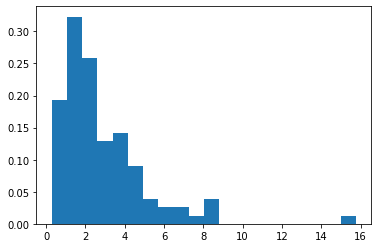

In [72]:
plt.hist(all_returns, density=True, bins=20)

In [73]:
all_returns = [] 
for i in range(100):
    returns = np.array(returns)
    np.random.shuffle(returns)
    samples = np.array_split(returns, round(root))
    samples
    sum([np.prod(sample) for sample in samples]) / len(samples)
    all_returns.append(sum([np.prod(sample) for sample in samples]) / len(samples) - fee*sum(transaction)*2)

(array([0.1088802 , 0.43552082, 0.20687239, 0.1088802 , 0.08710416,
        0.04355208, 0.03266406, 0.01088802, 0.02177604, 0.        ,
        0.02177604, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01088802]),
 array([-0.05123634,  0.86720426,  1.78564486,  2.70408545,  3.62252605,
         4.54096665,  5.45940724,  6.37784784,  7.29628844,  8.21472903,
         9.13316963, 10.05161023, 10.97005082, 11.88849142, 12.80693202,
        13.72537261, 14.64381321, 15.56225381, 16.4806944 , 17.399135  ,
        18.3175756 ]),
 <a list of 20 Patch objects>)

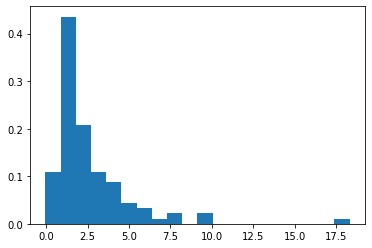

In [74]:
plt.hist(all_returns, density=True, bins=20)

---

In [1531]:
df = pd.DataFrame(np.nan, index=[i for i in range(270)], columns=BIST50)

In [4570]:
df = df.fillna(0)

In [4571]:
start_date = "01-01-2019"
end_date = "31-01-2020"
duration = []
transaction = []
short_transaction = [] 
negatives = []
positives = [] 
returns = [] 
for stock, index in zip(BIST50, range(len(BIST50))):
    frame = frame_.loc[frame_["stock_name"] == stock]
    frame = frame.loc[frame.index > start_date]
    frame = frame.loc[frame.index < end_date]
    
    frame['day'] = np.where((frame['MA_200_CH'] > -0.001) &
                        (frame['MA_100_CH'] > -0.002) &
                        (frame['MA_50_CH'] > -0.003) &
                        (frame['MA_14_CH'] > -0.004) &
                        # (frame['MA_7'] > frame['MA_50']) &
                        (frame['MA_14'] > (frame['MA_100']*0.90)) &
                        (frame['MA_20'] > (frame['MA_200']*0.95)) &
                        (frame['RSI_5'] > 30) &
                        (frame['RSI_5_CH'] > -0.02) &
                        (frame['RSI_CH'] > -0.02) &
                        (frame["StockValue_momentum"] > 95) &
                        (frame["MA_14_CH_CH"] > -3) &
                        (frame["MA_50_CH_CH"] > -2) &
                        (frame["MA_200_CH_CH"] > -1) &
                        (frame["MA_100_CH_CH"] > -0.5) &
                        (frame['market_positive_ma_10'] > 0.35)
                        # (frame['marketV_to_bookV'] < 10)
                        , "BUY", "SELL")
    
    locations = []
    start = 0
    for row in range(frame.shape[0]-1):
        if frame.day[row] == "BUY":
            mode = "BUY"
            if (frame.day[row] == "BUY" and frame.day[row+1] == "SELL"):
                end = row
                loc = [start, end]
                locations.append(loc)

        else:
            mode = "SELL"
            if (frame.day[row] == "SELL" and frame.day[row+1] == "BUY"):
                start = row+1
                
    for loc in locations:
        df.iloc[loc[0]:loc[1],index] = 1

In [3726]:
df.iloc[:20,:]

,TUPRS,VAKBN,TOASO,KRDMD,MGROS,DOHOL,AKBNK,TKFEN,FROTO,GARAN,...,ISFIN,ASELS,TAVHL,IPEKE,ULKER,CCOLA,GUBRF,AGHOL,ENJSA,total_transaction
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0


In [4572]:
count = 1
gen_list = []
for index in range(df.shape[1]):
    liste = [list(df)[index]]
    for stock_name in list(df)[count:]:
        if (df.iloc[:,index] + df[stock_name]).max() < 2:
            liste.append(stock_name)
    gen_list.append(liste)
    count += 1

In [4573]:
gen_list

[['TUPRS'],
 ['VAKBN', 'SODA'],
 ['TOASO'],
 ['KRDMD', 'TKFEN', 'AEFES', 'ISFIN'],
 ['MGROS', 'SISE', 'ISFIN', 'ASELS'],
 ['DOHOL'],
 ['AKBNK'],
 ['TKFEN', 'TSKB', 'ODAS', 'SASA', 'EKGYO', 'THYAO', 'AGHOL'],
 ['FROTO'],
 ['GARAN'],
 ['KOZAA'],
 ['HALKB', 'KOZAL', 'PETKM', 'EREGL', 'EKGYO', 'THYAO'],
 ['KORDS'],
 ['TCELL'],
 ['ENKAI', 'THYAO'],
 ['KOZAL'],
 ['VESTL', 'SODA'],
 ['TSKB', 'SODA', 'SISE', 'ISFIN', 'ASELS'],
 ['YKBNK', 'ASELS'],
 ['SODA', 'SKBNK', 'ODAS', 'YATAS', 'EKGYO', 'THYAO'],
 ['TTKOM', 'SISE', 'ASELS'],
 ['SKBNK', 'ASELS'],
 ['BIMAS'],
 ['ODAS', 'AEFES', 'THYAO', 'ISFIN'],
 ['PETKM', 'SISE'],
 ['SISE', 'YATAS', 'SASA', 'EKGYO', 'THYAO', 'AGHOL'],
 ['ANACM'],
 ['ARCLK'],
 ['YATAS', 'ISFIN', 'ASELS'],
 ['EREGL', 'AEFES'],
 ['SASA', 'ISFIN', 'ASELS'],
 ['ALARK'],
 ['SAHOL'],
 ['AEFES', 'THYAO', 'TRKCM', 'ASELS'],
 ['EKGYO', 'ISFIN', 'ASELS'],
 ['THYAO', 'ISFIN', 'ASELS'],
 ['HEKTS'],
 ['PGSUS', 'ASELS'],
 ['ISCTR'],
 ['TRKCM'],
 ['KCHOL'],
 ['ISFIN', 'AGHOL'],
 ['ASELS'

In [3767]:
list(df)[1:]

['VAKBN',
 'TOASO',
 'KRDMD',
 'MGROS',
 'DOHOL',
 'AKBNK',
 'TKFEN',
 'FROTO',
 'GARAN',
 'KOZAA',
 'HALKB',
 'KORDS',
 'TCELL',
 'ENKAI',
 'KOZAL',
 'VESTL',
 'TSKB',
 'YKBNK',
 'SODA',
 'TTKOM',
 'SKBNK',
 'BIMAS',
 'ODAS',
 'PETKM',
 'SISE',
 'ANACM',
 'ARCLK',
 'YATAS',
 'EREGL',
 'SASA',
 'ALARK',
 'SAHOL',
 'AEFES',
 'EKGYO',
 'THYAO',
 'HEKTS',
 'PGSUS',
 'ISCTR',
 'TRKCM',
 'KCHOL',
 'ISFIN',
 'ASELS',
 'TAVHL',
 'IPEKE',
 'ULKER',
 'CCOLA',
 'GUBRF',
 'AGHOL',
 'ENJSA',
 'total_transaction']

---

In [1275]:
frame_ = pd.read_pickle("frame_whole_BIST50")

In [1371]:
stock_name = "ENKAI"
start_date = "01-01-2019"
end_date = "31-07-2020"

In [1372]:
frame = frame_.loc[frame_["stock_name"] == stock_name]
frame = frame.loc[frame.index > start_date]
frame = frame.loc[frame.index < end_date]

In [1373]:
# MA_100_CH 0'dan büyük ve MA_14_CH de -0.05'ten büyükse
frame['check_1'] = frame['MA_200_CH'] > -0.001
frame['check_2'] = frame['MA_100_CH'] > -0.002
frame['check_3'] = frame['MA_50_CH'] > -0.003
frame['check_4'] = frame['MA_14_CH'] > -0.004
frame['check_5'] = frame['MA_14'] > (frame['MA_100']*0.90)
frame['check_6'] = frame['MA_20'] > (frame['MA_200']*0.95)
frame['check_7'] = frame['RSI_5'] > 35
frame['check_8'] = frame["StockValue_momentum"] > 100

frame['check_9'] = frame["MA_14_CH_CH"] > -2
frame['check_10'] = frame["MA_50_CH_CH"] > -1
frame['check_11'] = frame["MA_200_CH_CH"] > -0.5
frame['check_12'] = frame["MA_100_CH_CH"] > -0.1

frame['check_13'] = frame['market_positive_ma_10'] > 0.35
frame['check_14'] = frame['RSI_5_CH'] > -0.02
frame['check_15'] = frame['RSI_CH'] > -0.02

In [1374]:
frame["first_check"] = frame.iloc[:,-15:-7].sum(axis=1)
frame["second_check"] = frame.iloc[:,-8:-4].sum(axis=1)
frame["third_check"] = frame.iloc[:,-4:-2].sum(axis=1)

In [1375]:
# MA_100_CH 0'dan büyük ve MA_14_CH de -0.05'ten büyükse
frame['day'] = np.where((frame["first_check"] == 8) &
                        (frame["second_check"] >=3) &
                        (frame["third_check"] >=2)
                        , "BUY", "SELL")

In [1376]:
locations = []
start = 0
for row in range(frame.shape[0]-1):
    if frame.day[row] == "BUY":
        mode = "BUY"
        if (frame.day[row] == "BUY" and frame.day[row+1] == "SELL"):
            end = row
            loc = [start, end]
            locations.append(loc)

    else:
        mode = "SELL"
        if (frame.day[row] == "SELL" and frame.day[row+1] == "BUY"):
            start = row+1

In [1377]:
locations

[[0, 0],
 [6, 8],
 [11, 12],
 [15, 30],
 [38, 41],
 [45, 51],
 [58, 59],
 [71, 88],
 [104, 114],
 [116, 117],
 [119, 137],
 [139, 140],
 [143, 146],
 [162, 173],
 [183, 192]]

In [1378]:
sum([i[1] - i[0] for i in locations])

98

In [1379]:
rets = []
for obs in locations:
    ret = (frame.StockValue[obs[1]] - frame.StockValue[obs[0]]) / frame.StockValue[obs[0]]
    rets.append(ret)
    print(ret)

0.0
-0.006605529577337034
0.011009215962228121
0.05052937603054757
0.0
0.02670560352124595
0.010242360379346583
0.05131934344483688
-0.007633587786259549
0.038610038610038644
0.09532710280373845
-0.008620689655172384
-0.008445945945945915
-0.01551724137931032
0.001982300884955691


In [1380]:
rets = [ret + 1 for ret in rets]

In [1381]:
retur = 1
for ret in rets:
    retur = retur * ret
retur

1.259458997394128

---

In [1080]:
stocks = BIST50
# np.random.shuffle(stocks)
# stocks = np.array_split(stocks, 4)
# stocks = list(stocks[0])
# stocks

In [1081]:
# stocks = ["THYAO", "BIMAS", "AEFES", "EREGL", "TKFEN", "ENKAI", "SISE", "KOZAL", "KOZAA", "PGSUS", "PETKM", "TCELL"] 

In [1219]:
start_date = "01-01-2015"
end_date = "31-01-2020"
duration = []
transaction = []
short_transaction = [] 
negatives = []
positives = [] 
returns = [] 
for stock in stocks:
    frame = frame_.loc[frame_["stock_name"] == stock]
    frame = frame.loc[frame.index > start_date]
    frame = frame.loc[frame.index < end_date]
    
    # MA_100_CH 0'dan büyük ve MA_14_CH de -0.05'ten büyükse
    frame['check_1'] = frame['MA_200_CH'] > -0.001
    frame['check_2'] = frame['MA_100_CH'] > -0.002
    frame['check_3'] = frame['MA_50_CH'] > -0.003
    frame['check_4'] = frame['MA_14_CH'] > -0.004
    frame['check_5'] = frame['MA_14'] > (frame['MA_100']*0.90)
    frame['check_6'] = frame['MA_20'] > (frame['MA_200']*0.95)
    frame['check_7'] = frame['RSI_5'] > 35
    frame['check_8'] = frame["StockValue_momentum"] > 100

    frame['check_9'] = frame["MA_14_CH_CH"] > -2
    frame['check_10'] = frame["MA_50_CH_CH"] > -1
    frame['check_11'] = frame["MA_200_CH_CH"] > -0.5
    frame['check_12'] = frame["MA_100_CH_CH"] > -0.2

    frame['check_13'] = frame['market_positive_ma_10'] > 0.35
    frame['check_14'] = frame['RSI_5_CH'] > -0.02
    frame['check_15'] = frame['RSI_CH'] > -0.02
    
    frame["first_check"] = frame.iloc[:,-15:-7].sum(axis=1)
    frame["second_check"] = frame.iloc[:,-8:-4].sum(axis=1)
    frame["third_check"] = frame.iloc[:,-4:-2].sum(axis=1)
    
    # MA_100_CH 0'dan büyük ve MA_14_CH de -0.05'ten büyükse
    frame['day'] = np.where((frame["first_check"] == 8) &
                            (frame["second_check"] >=3) &
                            (frame["third_check"] >=2)
                        , "BUY", "SELL")
    
    locations = []
    start = 0
    for row in range(frame.shape[0]-1):
        if frame.day[row] == "BUY":
            mode = "BUY"
            if (frame.day[row] == "BUY" and frame.day[row+1] == "SELL"):
                end = row
                loc = [start, end]
                locations.append(loc)

        else:
            mode = "SELL"
            if (frame.day[row] == "SELL" and frame.day[row+1] == "BUY"):
                start = row+1
         
    duration.append(sum([i[1] - i[0] for i in locations])) 
    transaction.append(len(locations))
    short_transaction.append(len([i for i in locations if i[0]-i[1] == 0]))
        
    rets = []
    for obs in locations:
        ret = (frame.StockValue[obs[1]] - frame.StockValue[obs[0]]) / frame.StockValue[obs[0]]
        rets.append(ret)
        
    rets = [ret + 1 for ret in rets]
    
    retur = 1
    for ret in rets:
        retur = retur * ret
        
    rets = np.array(rets)
    
    negative_ones = rets[np.where(rets<1)]
    negatives.append(negative_ones)
    
    positive_ones = rets[np.where(rets>1)]
    positives.append(positive_ones)
    
    returns.append(retur)

In [1220]:
returns = [ret - 0.03 for ret in returns]

In [1221]:
np.prod(returns) 

3.943601644850099e+25

In [1222]:
print(f"number of total transaction : {sum(transaction)}")

number of total transaction : 2623


In [1223]:
fee = 9/10000
print(f"Total commission fee: {fee*sum(transaction)*2}")

Total commission fee: 4.7214


In [1224]:
print(f"number of short transactions : {sum(short_transaction)}")

number of short transactions : 665


In [1225]:
print(f"short transaction ratio : {round(sum(short_transaction) / sum(transaction),2)}")

short transaction ratio : 0.25


In [1226]:
print(f"Total exposure day : {sum(duration)}")

Total exposure day : 19453


In [1227]:
print(f"Number of positive returns : {len(np.concatenate(positives))}")

Number of positive returns : 1157


In [1228]:
print(f"mean of positives : {np.concatenate(positives).mean()}")

mean of positives : 1.0731023698232371


In [1229]:
print(f"Number of negative returns : {len(np.concatenate(negatives))}")

Number of negative returns : 728


In [1230]:
print(f"mean of negatives : {np.concatenate(negatives).mean()}")

mean of negatives : 0.9785109710600369


In [1231]:
print(f"Positives / Negatives : {len(np.concatenate(positives)) / len(np.concatenate(negatives))}")

Positives / Negatives : 1.5892857142857142


In [1232]:
root = sum(duration) / 1000
root

19.453

In [1233]:
pow(np.prod(returns),(1/root))

20.6909899460072

In [1200]:
returns = np.array(returns)

In [1201]:
np.random.shuffle(returns)

In [1202]:
samples = np.array_split(returns, round(root))
samples

[array([87.28226564, 30.56161024, 22.85015533]),
 array([ 6.54754132,  1.10078358, 11.13424   ]),
 array([15.80826647, 64.10233141,  3.10347643]),
 array([ 6.71835641,  3.78985914, 11.17038724]),
 array([12.7365539 , 22.36552146,  2.65831506]),
 array([ 4.73283785,  8.16085412, 11.84825698]),
 array([10.01355472,  8.5413923 ,  8.68586995]),
 array([ 7.59123944, 21.70656554,  7.40774522]),
 array([ 9.05541785, 18.43146984,  6.34880834]),
 array([ 5.00928937,  3.87292224, 10.4884252 ]),
 array([ 4.98973493, 11.19192843]),
 array([18.93596667,  6.41374879]),
 array([12.60880908,  4.50800915]),
 array([21.7198913 , 14.96555554]),
 array([12.41092359,  5.24608955]),
 array([7.00224796, 3.72092992]),
 array([10.00843003,  7.01085831]),
 array([16.54102248, 16.40684547]),
 array([11.67468795,  5.15610988]),
 array([ 4.78873744, 21.54136487])]

In [1203]:
sum([np.prod(sample) for sample in samples]) / len(samples)

3502.942432241518

---

In [180]:
stocks = pd.read_pickle("stocks_values")

In [181]:
stocks

,HGDG_HS_KODU,HGDG_TARIH,HGDG_KAPANIS,HGDG_AOF,HGDG_MIN,HGDG_MAX,HGDG_HACIM,END_ENDEKS_KODU,END_TARIH,END_SEANS,...,HG_MIN,HG_MAX,PD,PD_USD,HAO_PD,HAO_PD_USD,HG_HACIM,DOLAR_BAZLI_MIN,DOLAR_BAZLI_MAX,DOLAR_BAZLI_AOF
0,RYSAS,2006-05-04,2.2832,2.341512,2.241314,2.387942,17584032.0,01,1146686400000,2,...,5.45,5.65,2.725000e+08,2.057846e+08,9.5375e+07,7.20246e+07,12848505.0,1.6926,1.8033,1.7682
1,RYSAS,2006-05-04,2.2832,2.341512,2.241314,2.387942,17584032.0,01,1146686400000,2,...,5.45,5.65,2.725000e+08,2.057846e+08,9.5375e+07,7.20246e+07,4735527.0,1.6926,1.8033,1.7682
2,RYSAS,2006-07-24,1.6506,1.670437,1.642234,1.692506,1535088.0,01,1153684800000,2,...,3.92,3.98,1.970000e+08,1.268186e+08,6.895e+07,4.43865e+07,1149417.0,1.0572,1.0895,1.0753
3,RYSAS,2006-07-24,1.6506,1.670437,1.642234,1.692506,1535088.0,01,1153684800000,2,...,3.92,3.98,1.970000e+08,1.268186e+08,6.895e+07,4.43865e+07,385671.0,1.0572,1.0895,1.0753
4,RYSAS,2006-08-10,1.7093,1.703217,1.692506,1.726021,948715.0,01,1155153600000,2,...,4.04,4.08,2.040000e+08,1.405346e+08,7.14e+07,4.91871e+07,528687.0,1.1660,1.1890,1.1733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,GENTS,2020-06-23,2.5200,2.496000,2.410000,2.560000,17966916.0,01,1592859600000,2,...,2.41,2.56,3.880800e+08,5.660196e+07,2.01608e+08,2.94047e+07,17966916.0,0.3515,0.3734,0.3640
2,GENTS,2020-06-24,2.5400,2.542000,2.500000,2.580000,7666096.0,01,1592946000000,2,...,2.50,2.58,3.911600e+08,5.704119e+07,2.03208e+08,2.96329e+07,7666096.0,0.3646,0.3762,0.3707
0,EDIP,2020-06-22,2.1300,2.159000,2.120000,2.200000,9163828.0,01,1592773200000,2,...,2.12,2.20,1.384500e+08,2.019841e+07,5.73183e+07,8.36214e+06,9163828.0,0.3093,0.3210,0.3150
1,EDIP,2020-06-23,2.1600,2.164000,2.120000,2.220000,13089141.0,01,1592859600000,2,...,2.12,2.22,1.404000e+08,2.047752e+07,5.81256e+07,8.47769e+06,13089141.0,0.3092,0.3238,0.3156
